In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoker-status-prediction/train_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.style.use("ggplot")
sns.set(rc={'figure.figsize': (10, 6)})

In [ ]:
df = pd.read_csv("train_dataset.csv")

In [ ]:
print("------ INFO ------")
display(df.info())

print("------ SHAPE ------")
print(df.shape)

------ INFO ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin       

None

------ SHAPE ------
(38984, 23)


------ Missing Values ------
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64


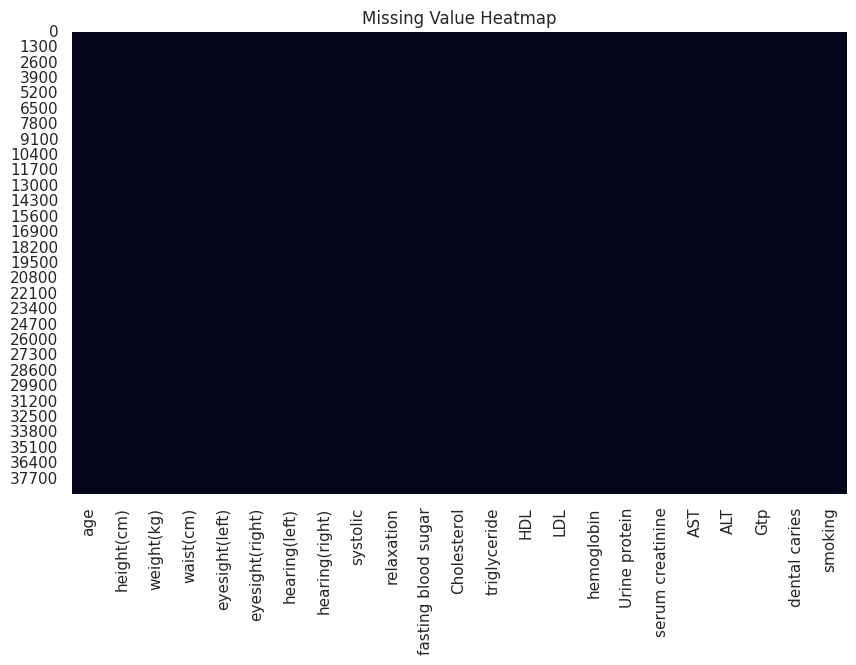

In [ ]:
# 3. Missing Values
# ================================
print("------ Missing Values ------")
print(df.isnull().sum())



In [ ]:
# 4. Descriptive Statistics
# ================================
print("------ DESCRIPTIVE STATISTICS ------")
display(df.describe(include="all"))

------ DESCRIPTIVE STATISTICS ------


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


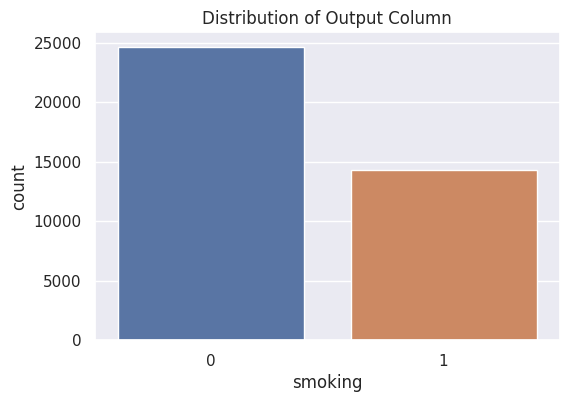

smoking
0    24666
1    14318
Name: count, dtype: int64
smoking
0    63.272112
1    36.727888
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['smoking'])
plt.title("Distribution of Output Column")
plt.show()

print(df['smoking'].value_counts())
print(df['smoking'].value_counts(normalize=True) * 100)


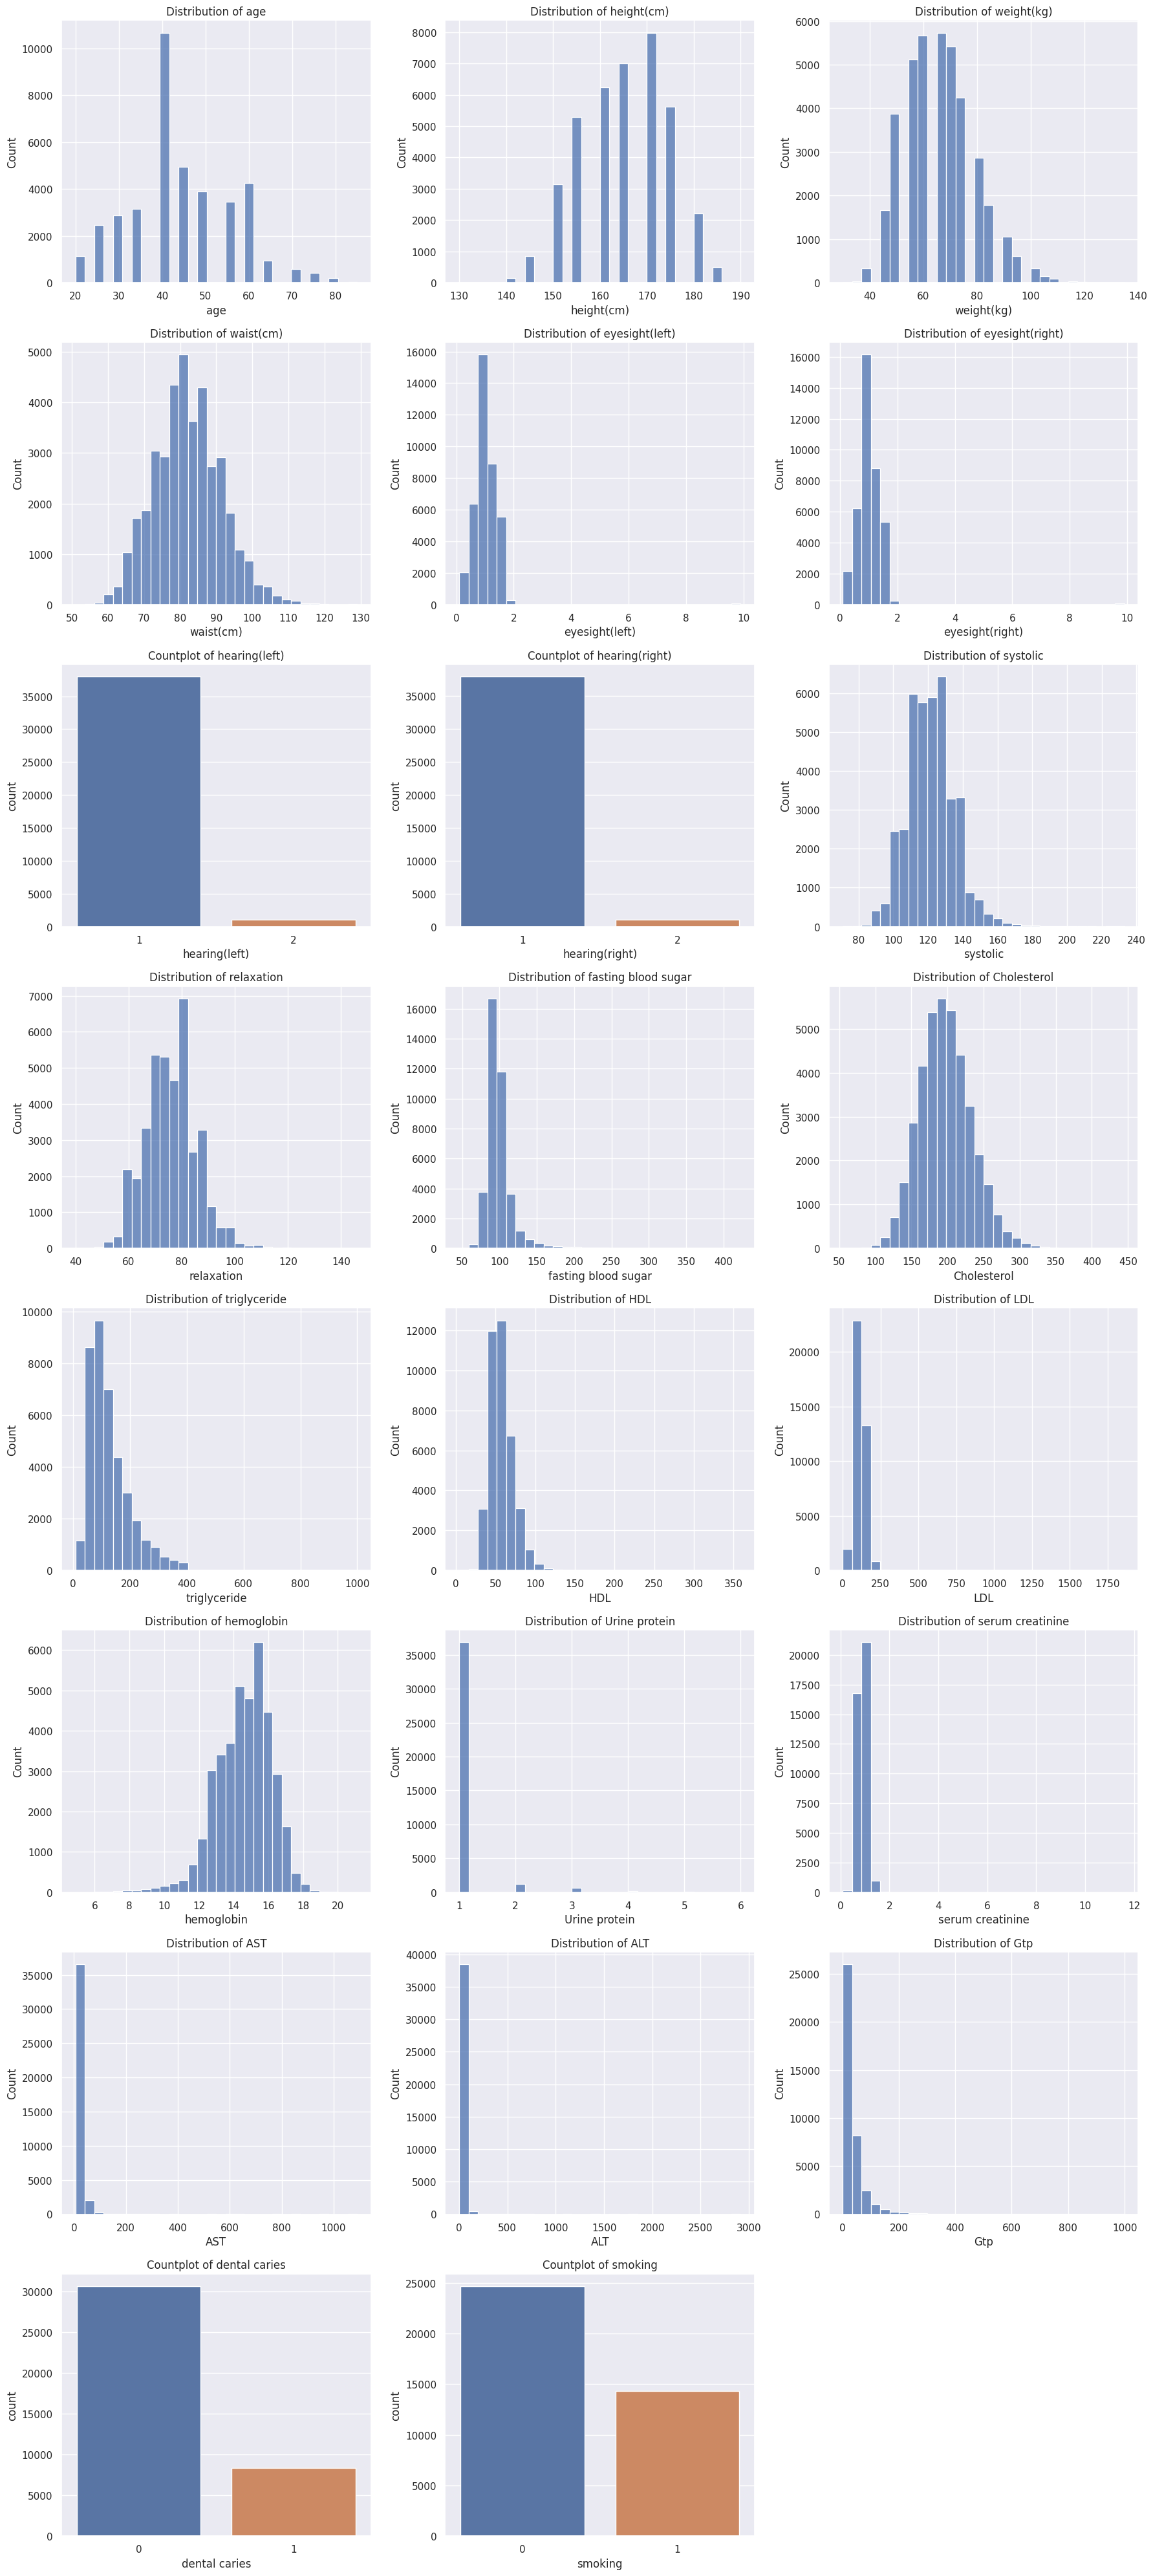

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Replace infinite values in DF
df = df.replace([np.inf, -np.inf], np.nan)

# 5. Distribution of Numerical Features
num_cols = df.select_dtypes(include=np.number).columns.tolist()

n = len(num_cols)
rows = (n // 3) + 1
plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)

    if df[col].nunique() <= 2:
        sns.countplot(x=df[col])
        plt.title(f"Countplot of {col}")
    else:
        sns.histplot(df[col], bins=30, kde=False)
        plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

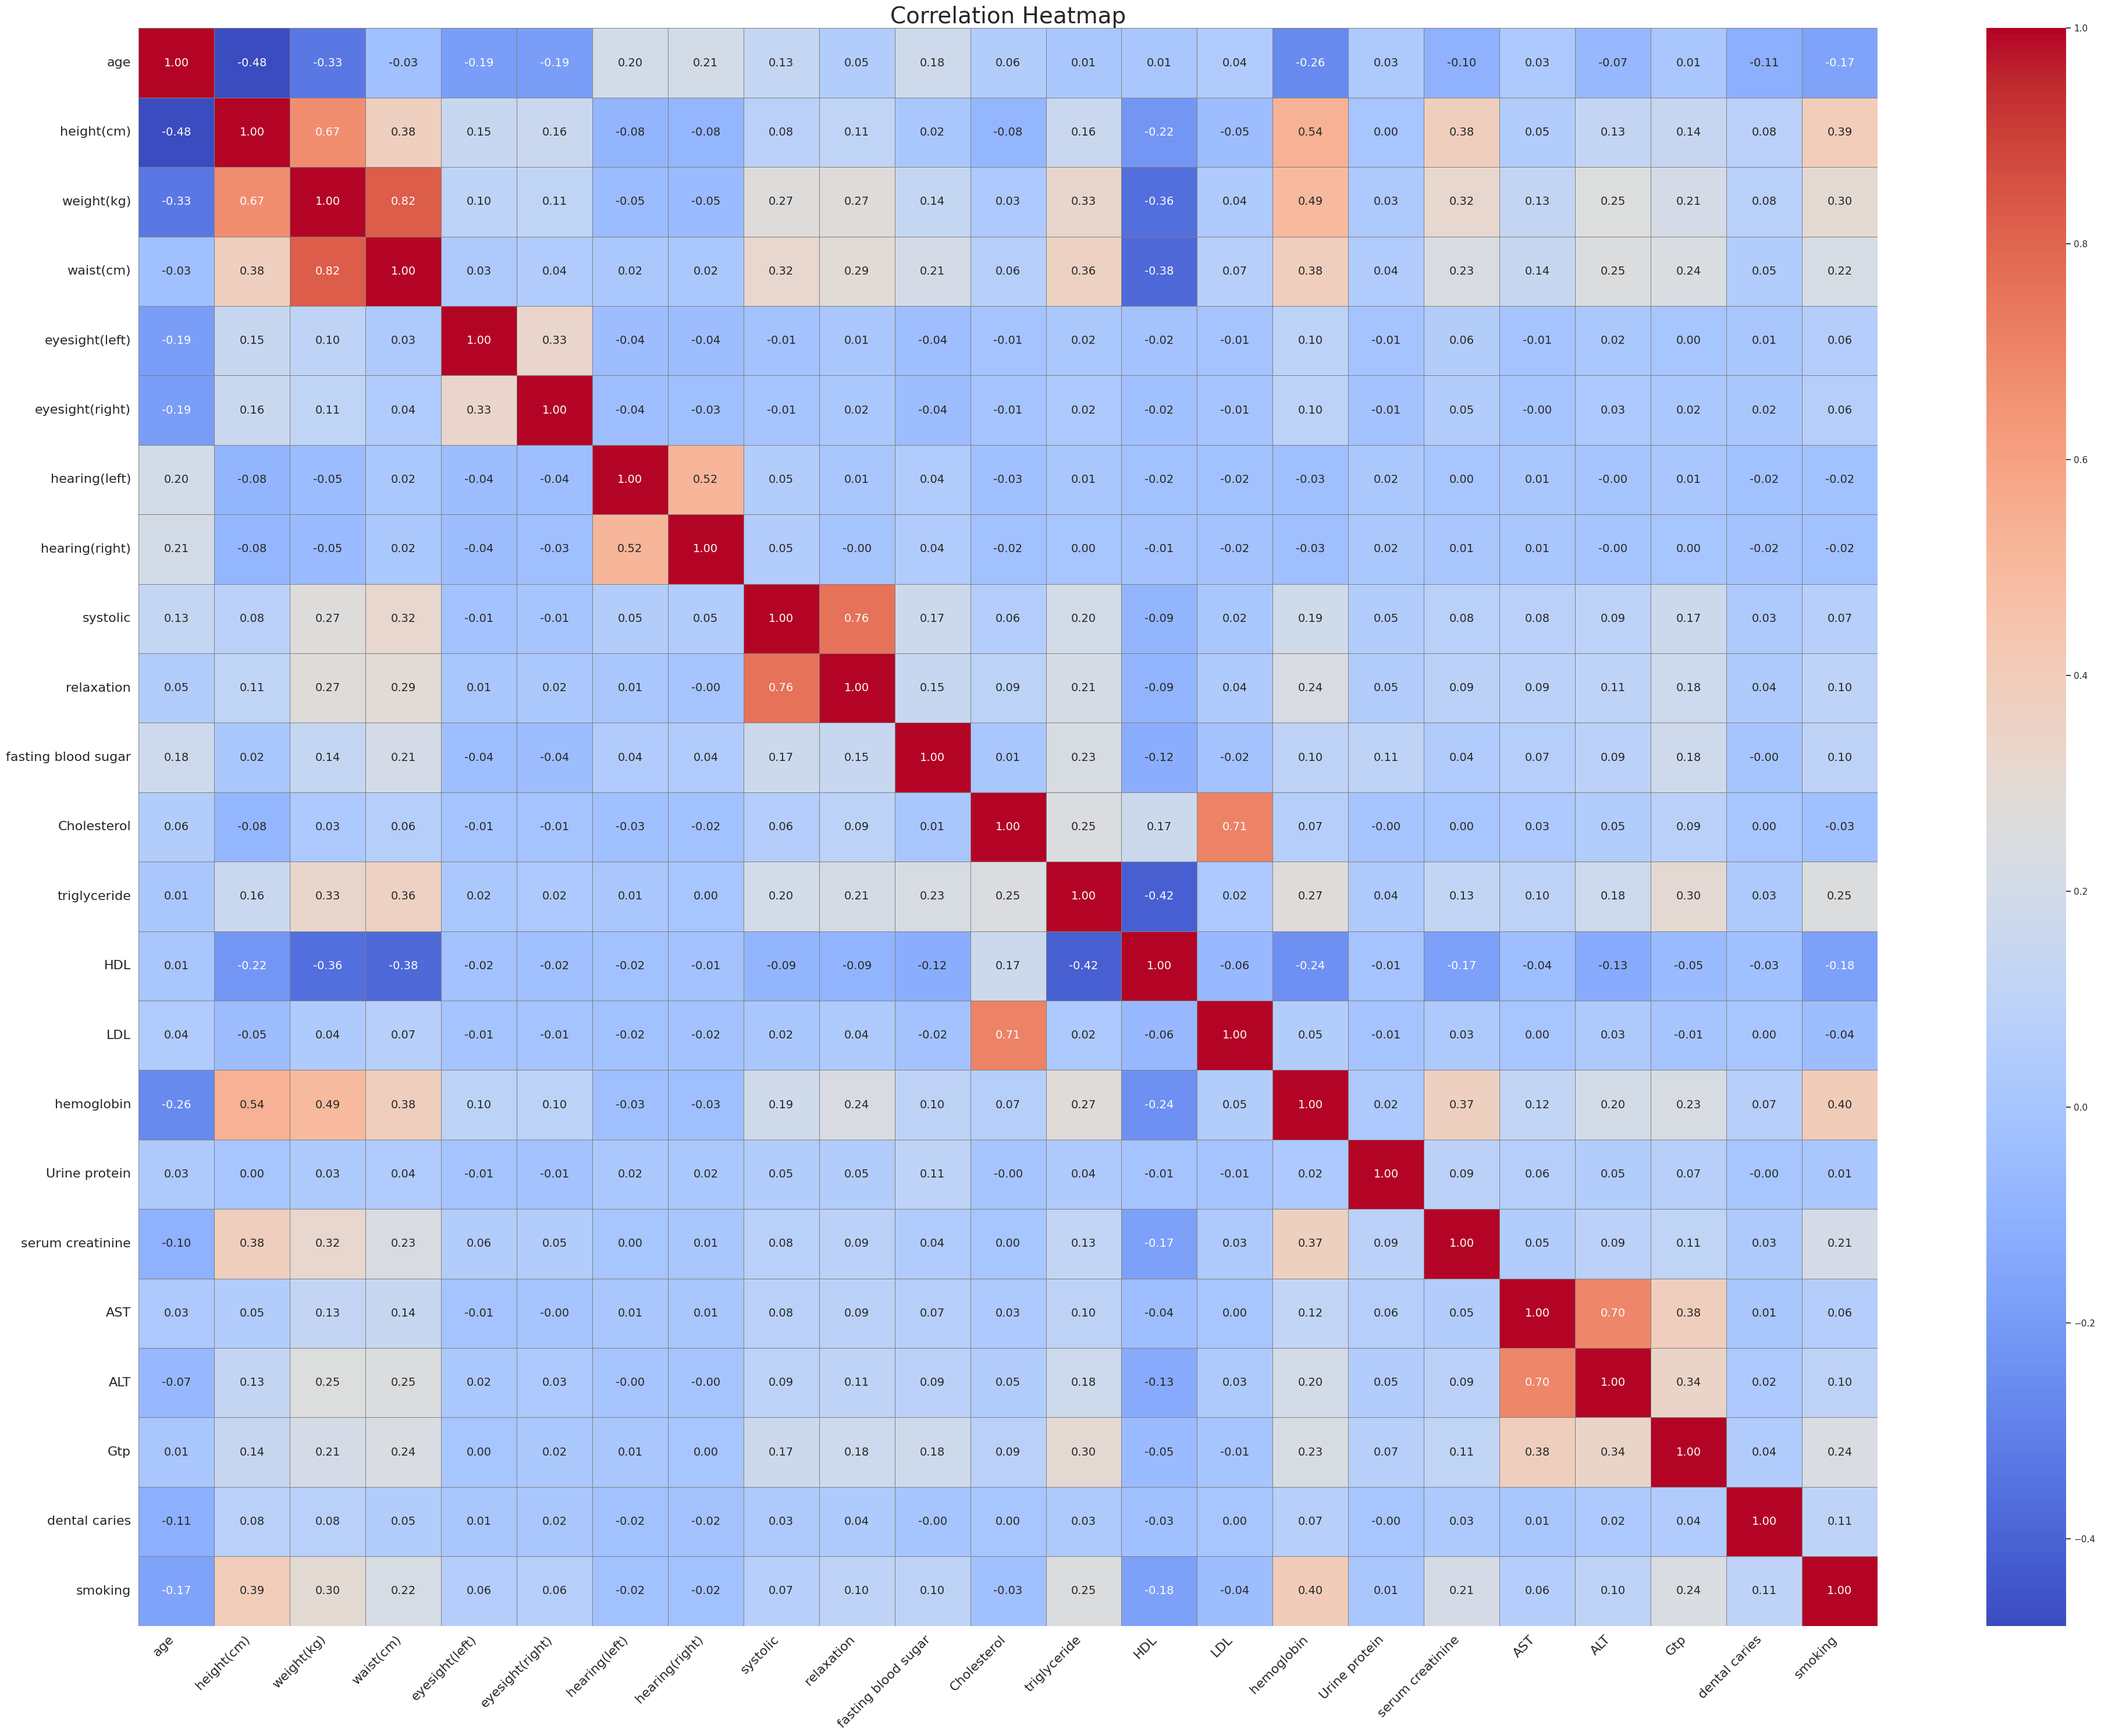

In [ ]:
# 7. Correlation Heatmap
# ================================
plt.figure(figsize=(40, 30))  # MUCH bigger figure

sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 14},   # increase annotation text size
    linewidths=0.5,
    linecolor="gray"
)

plt.title("Correlation Heatmap", fontsize=28)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


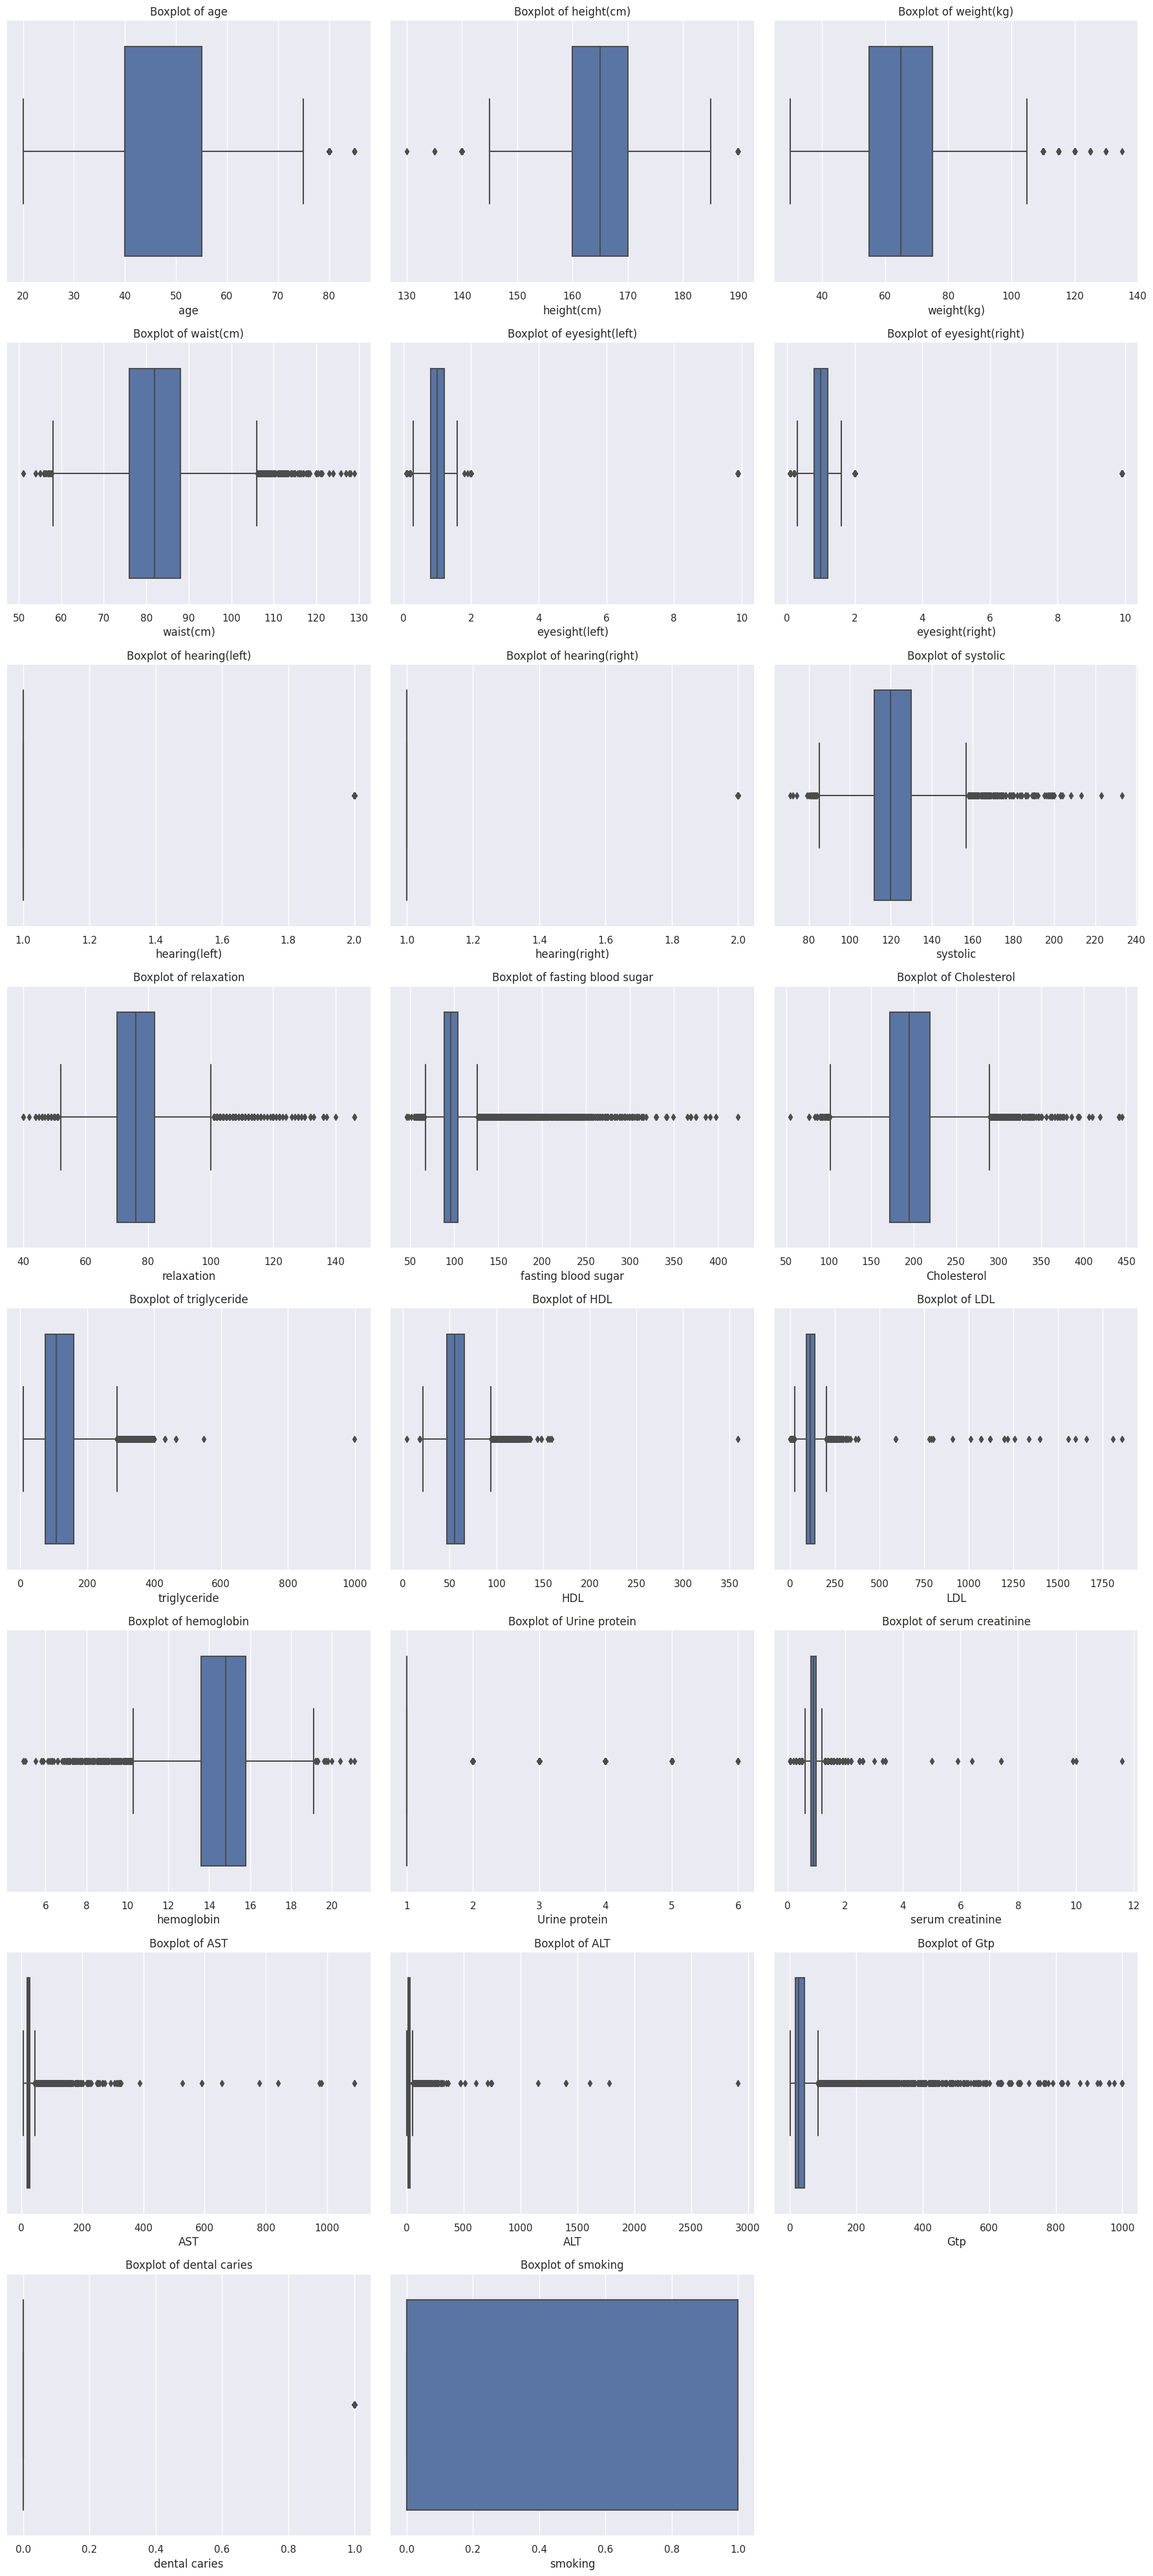

In [ ]:
# 8. Outlier Detection (Boxplots)
num_cols = df.select_dtypes(include=np.number).columns.tolist()

n = len(num_cols)
rows = (n // 3) + 1     # 3 per row
plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()